### Project Name: Uber Price Modeling <br> Project Type: Data Analysis <br> DSC 478 – Programming Machine Learning Applications <br> Decision Tree Analysis - Nick Kutella


In [1]:
# Import Libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

# Set working directory

In [2]:
cd d:\\0r2768\\PERSONAL\\TUITION\\DSC_478\\Final_Project

d:\0r2768\PERSONAL\TUITION\DSC_478\Final_Project


### Building a Decision Tree Classifier

In [3]:
# Load dataset
uber_df_usa = pd.read_csv("Data/uber_usa.csv", delimiter=",")
uber_df_usa.drop(columns=['Unnamed: 0'], inplace=True)
uber_df_usa.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_of_week,hour,month,year,manhattan_dist,haversine_distance,fare_rate,log_fare_rate,geometry
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,3,19,5,2015,0.015442,1.045970,7.170380,1.969959,POINT (-73.99951171875 40.72321701049805)
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,4,20,7,2009,0.022455,1.527078,5.042311,1.617864,POINT (-73.99471 40.750325)
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0,21,8,2009,0.074355,3.129464,4.122112,1.416366,POINT (-73.962565 40.772647)
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,4,8,6,2009,0.023313,1.032524,5.133054,1.635701,POINT (-73.965316 40.803349)
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,3,17,8,2014,0.065221,2.780920,5.753493,1.749807,POINT (-73.97308199999999 40.761247)


In [4]:
uber_df_usa.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_of_week,hour,month,year,manhattan_dist,haversine_distance,fare_rate,log_fare_rate
count,191587.000000,191587.000000,191587.000000,191587.000000,191587.000000,191587.000000,191587.000000,191587.000000,191587.000000,191587.000000,191587.000000,191587.000000,191587.000000,191587.000000
mean,11.329149,-73.975602,40.750837,-73.974640,40.751117,1.690360,3.049842,13.495519,6.282383,2011.748067,0.045088,2.116353,7.164275,1.851505
std,9.511826,0.038700,0.029887,0.038410,0.033797,1.305597,1.946396,6.514760,3.440902,1.862507,0.054264,2.481381,7.311311,0.434443
min,0.010000,-75.419276,39.603895,-75.423067,39.603429,1.000000,0.000000,0.000000,1.000000,2009.000000,0.001603,0.100190,0.002257,-6.093777
25%,6.000000,-73.992282,40.736511,-73.991600,40.735389,1.000000,1.000000,9.000000,3.000000,2010.000000,0.016956,0.807375,4.768864,1.562108
50%,8.500000,-73.982147,40.753317,-73.980592,40.753772,1.000000,3.000000,14.000000,6.000000,2012.000000,0.028686,1.365243,6.127267,1.812749
75%,12.500000,-73.968560,40.767567,-73.965654,40.768348,2.000000,5.000000,19.000000,9.000000,2013.000000,0.051530,2.464035,8.063107,2.087299
max,230.000000,-69.041415,42.478467,-69.046738,42.464187,6.000000,6.000000,23.000000,12.000000,2015.000000,1.714877,81.115398,963.254004,6.870317


In [5]:
uber_df_usa.fare_rate.describe()

count    191587.000000
mean          7.164275
std           7.311311
min           0.002257
25%           4.768864
50%           6.127267
75%           8.063107
max         963.254004
Name: fare_rate, dtype: float64

In [6]:
# Remove large fare rates
uber_df_usa = uber_df_usa[uber_df_usa['fare_rate'] < 30]

uber_df_usa.fare_rate.describe()

count    190626.000000
mean          6.873650
std           3.219120
min           0.002257
25%           4.762602
50%           6.112560
75%           8.020505
max          29.997149
Name: fare_rate, dtype: float64

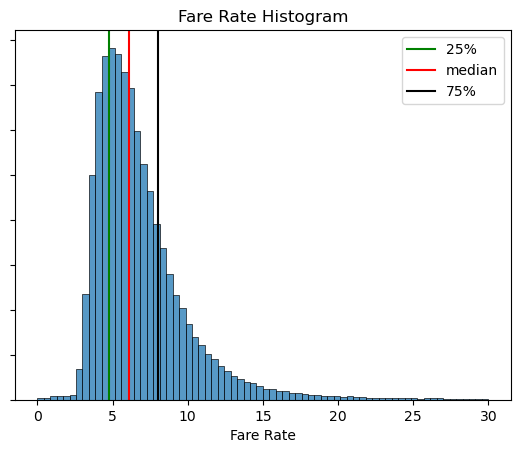

Mean Fare Rate: $6.87
Median Fare Rate: $6.11
Lowest 25% Fare Rate: $4.76


In [7]:
# Plot histogram of rate rate
fare_rate_hist = sns.histplot(uber_df_usa,x="fare_rate", bins=70)
fare_rate_hist.set(title='Fare Rate Histogram', xlabel='Fare Rate', ylabel='', yticklabels=[])
fare_rate_hist.set(yticklabels=[])
fare_rate_hist.plot()

# Determine quartiles and add them to the plot
q_tile = np.quantile(uber_df_usa['fare_rate'], [0.25,0.5,0.75])
colors = ['green','red','black']
for q, c in zip(q_tile, colors):
    plt.axvline(q, 0, 1, color=c, ls='-')

plt.legend(("25%", "median", "75%"))
plt.show()

# Print the mean, median, and lowest 25% rate rates.
print("Mean Fare Rate: ${:.2f}".format(np.mean(uber_df_usa['fare_rate'])))
print("Median Fare Rate: ${:.2f}".format(q_tile[1]))
print("Lowest 25% Fare Rate: ${:.2f}".format(q_tile[0]))
uber_df_usa['low_rate'] = (uber_df_usa['fare_rate'] < q_tile[0])

In [8]:
uber_df_usa[['fare_rate','low_rate']].head()

,fare_rate,low_rate
0,7.170380,False
1,5.042311,False
2,4.122112,True
3,5.133054,False
4,5.753493,False


In [9]:
# Select features and target variables
uber_df_usa_final = uber_df_usa[['passenger_count', 'manhattan_dist', 'haversine_distance', 'day_of_week', 'hour', 'month']]
target = uber_df_usa['low_rate']

In [10]:
uber_df_usa_final.head()

,passenger_count,manhattan_dist,haversine_distance,day_of_week,hour,month
0,1,0.015442,1.045970,3,19,5
1,1,0.022455,1.527078,4,20,7
2,1,0.074355,3.129464,0,21,8
3,3,0.023313,1.032524,4,8,6
4,5,0.065221,2.780920,3,17,8


In [11]:
from sklearn.model_selection import GridSearchCV

tree_parameters = {'criterion':['gini','entropy'], 'max_depth':[6,7,8,9,10,11,12], 'min_samples_split':[10,50,100,500,1000], 'max_features':['auto','sqrt','log2','None'], 'min_samples_leaf':[100,200,300,400,500]}
clf = GridSearchCV(tree.DecisionTreeClassifier(), tree_parameters, return_train_score=True, cv=5, verbose=10)
clf.fit(uber_df_usa_final, target)

Fitting 5 folds for each of 1400 candidates, totalling 7000 fits
[CV 1/5; 1/1400] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=100, min_samples_split=10
[CV 1/5; 1/1400] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=100, min_samples_split=10;, score=(train=0.834, test=0.832) total time=   0.1s
[CV 2/5; 1/1400] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=100, min_samples_split=10
[CV 2/5; 1/1400] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=100, min_samples_split=10;, score=(train=0.835, test=0.835) total time=   0.2s
[CV 3/5; 1/1400] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=100, min_samples_split=10
[CV 3/5; 1/1400] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=100, min_samples_split=10;, score=(train=0.831, test=0.826) total time=   0.1s
[CV 4/5; 1/1400] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=100, min_s

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2', 'None'],
                         'min_samples_leaf': [100, 200, 300, 400, 500],
                         'min_samples_split': [10, 50, 100, 500, 1000]},
             return_train_score=True, verbose=10)

In [12]:
def plot_search_results(grid):
    """ Function plots the results of scikit-learns GridSearchCV function

    Parameters
    ---------- 
        grid: GridSearchCV object.

    Reterns
    -------
        N/A
    """

    ## Get results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Get indices of values per parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(15,5))
    fig.suptitle('Grid Search Cross-Validation - Mean Scores by Parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='-', marker='o', label='Test Score')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='o',label='Train Score' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

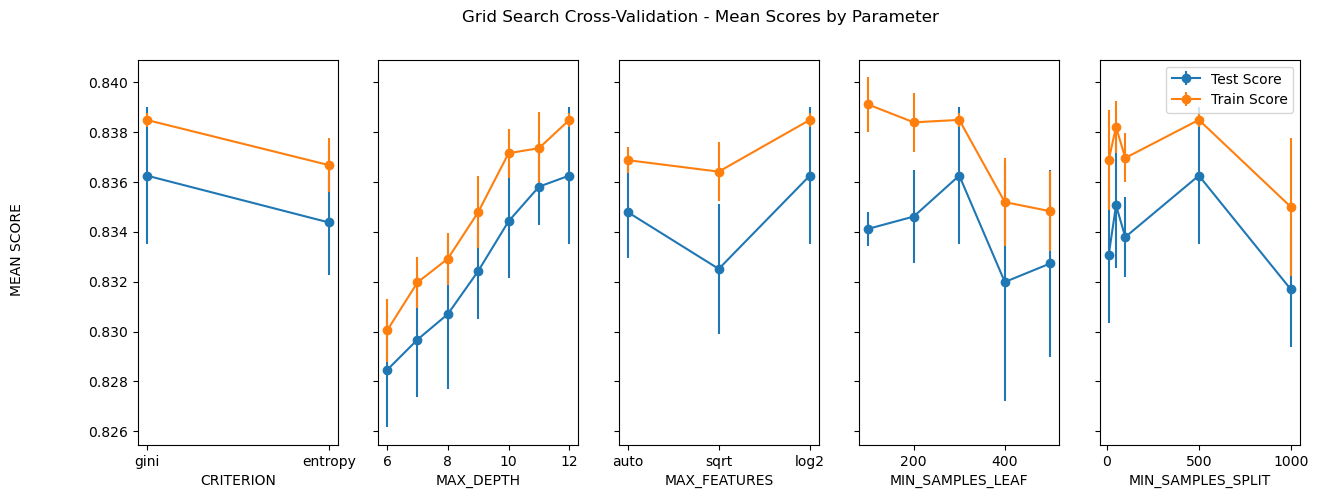

In [13]:
plot_search_results(clf)

In [14]:
print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 12, 'max_features': 'log2', 'min_samples_leaf': 300, 'min_samples_split': 500}


In [22]:
# Split the data into training and test sets
train, test, target_train, target_test = train_test_split(uber_df_usa_final, target, test_size=0.2, random_state=33)

# Initialize Tree object
treeclf = tree.DecisionTreeClassifier(criterion='gini', max_depth=12, max_features='log2', min_samples_leaf=300, min_samples_split=500)

# Train DT
treeclf = treeclf.fit(train, target_train)

In [23]:
# Predict on Training Data
treepreds_train = treeclf.predict(train)
print('Training Set', metrics.classification_report(target_train, treepreds_train))

Training Set               precision    recall  f1-score   support

       False       0.88      0.90      0.89    114281
        True       0.68      0.65      0.66     38219

    accuracy                           0.84    152500
   macro avg       0.78      0.77      0.78    152500
weighted avg       0.83      0.84      0.83    152500



In [24]:
# Predict on Testing Data
treepreds_test = treeclf.predict(test)
print('Test Set', metrics.classification_report(target_test, treepreds_test))

Test Set               precision    recall  f1-score   support

       False       0.88      0.90      0.89     28688
        True       0.67      0.64      0.65      9438

    accuracy                           0.83     38126
   macro avg       0.78      0.77      0.77     38126
weighted avg       0.83      0.83      0.83     38126



Text(0.5, 1.0, 'Final Decision Tree Model - Feature Importance')

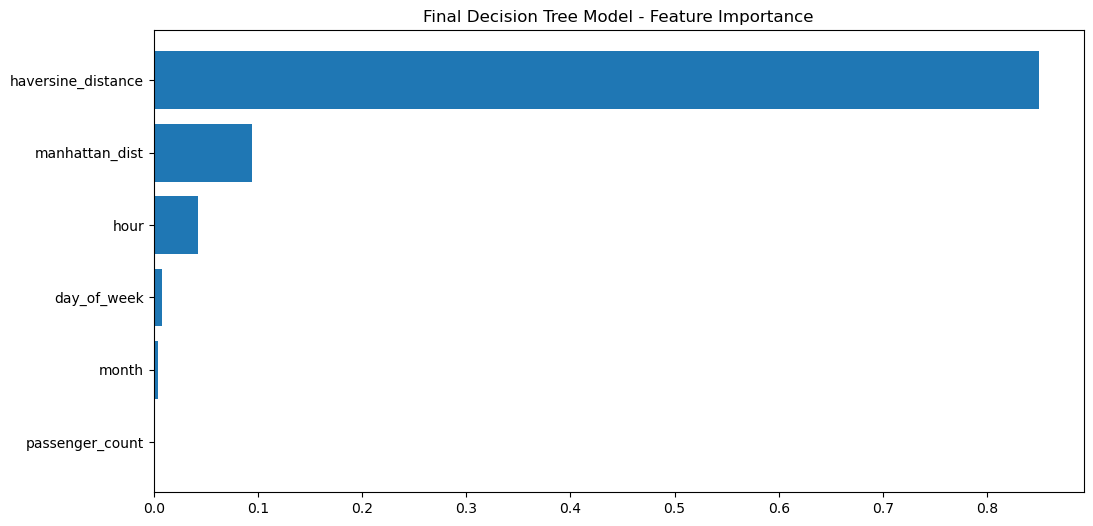

In [25]:
# Plot feature importance
feature_importance = treeclf.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(uber_df_usa_final.columns)[sorted_idx])
plt.title('Final Decision Tree Model - Feature Importance')


In [26]:

print(np.corrcoef((uber_df_usa_final.manhattan_dist,uber_df_usa_final.haversine_distance)))


[[1.        0.9855207]
 [0.9855207 1.       ]]


In [27]:
# Export tree visualization
from sklearn.tree import export_graphviz
export_graphviz(treeclf,out_file='tree.dot', feature_names=test.columns)

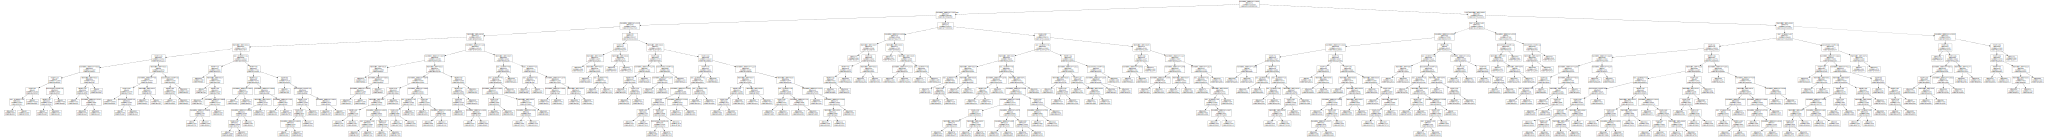

In [28]:
# View tree representation
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)